## Binning of sparse categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Raw_Housing_Prices3.csv")

In [3]:
data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [4]:
data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [6]:
mean = []

for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"] == i].mean())

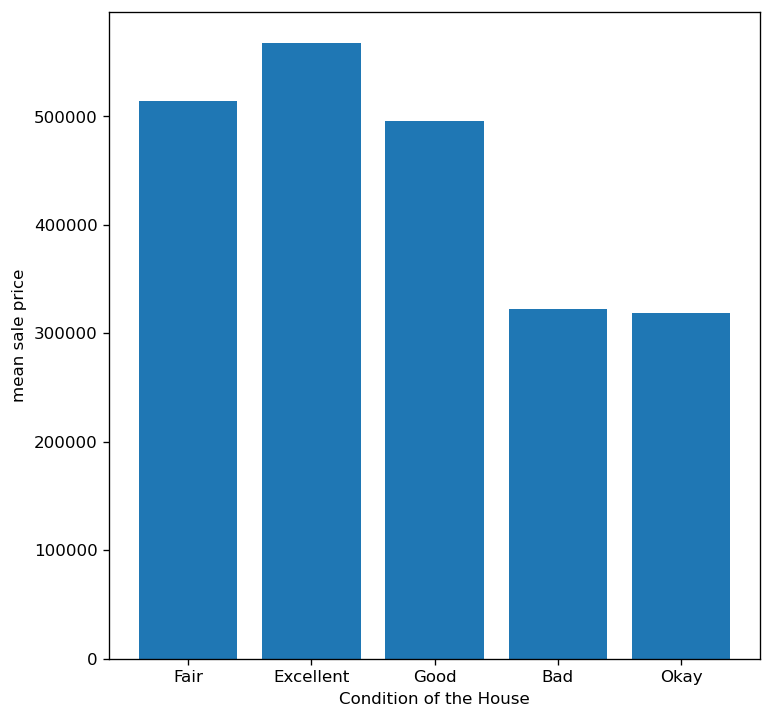

In [7]:
plt.figure(figsize=(7,7), dpi = 120)

plt.bar(data["Condition of the House"].unique(), mean)
plt.xlabel("Condition of the House")
plt.ylabel("mean sale price")
plt.show()

In [8]:
## Bad and Good are similar
## Fair and Good are similar 
# those are reduandants can be removed

In [9]:
mapping = {'Excellent':'Excellent',
          "Fair":'Good',
          'Good':'Good',
          'Okay':'Okay',
          'Bad':'Okay'}
data["Condition of the House"] = data["Condition of the House"].map(mapping)

In [10]:
mean = []

for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"] == i].mean())

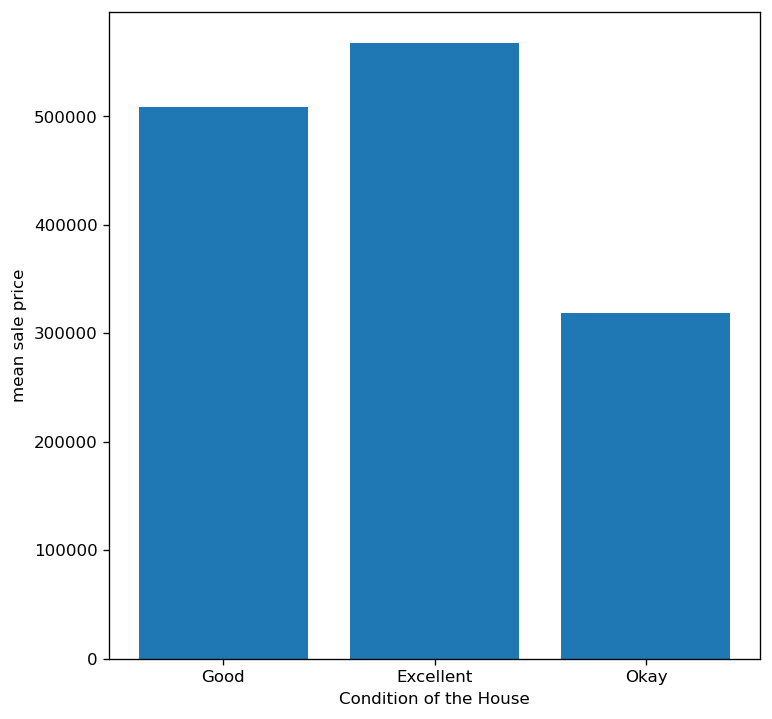

In [11]:
plt.figure(figsize=(7,7), dpi = 120)

plt.bar(data["Condition of the House"].unique(), mean)
plt.xlabel("Condition of the House")
plt.ylabel("mean sale price")
plt.show()

## Binning of Continuous Variables

In [12]:
len(data["Age of House (in Years)"].unique())

116

In [15]:
data["Age of House (in Years)"].min()

3

In [16]:
data["Age of House (in Years)"].max()

118

In [18]:
def age_of_house(x):
    if x <10:
        x = "new"
    elif x < 50:
        x = "old"
    else:
        x = "very bad"
    return x

In [19]:
cat_house_age = data["Age of House (in Years)"].map(age_of_house)
cat_house_age.unique()

array(['very bad', 'old', 'new'], dtype=object)